## DEFINICIÓN DE CONSTANTES FUNDAMENTALES  

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definir las constantes
g = 9.8 # gravedad [m/s^2]
p_atm = 101325 # Presión atmosférica [Pa]
beta = 3.67e-3 # Coeficiente de expansion termica [1/K]
T_w = 80.0 + 273.0 # Temperatura de la pared [K]
T_a = 20.0 + 273.0 # Temperatura ambiente [K]
delta_T = T_w - T_a
lambda_f = 0.04 # Coeficiente de friccion [adimensional]
R = 10.0 # Radio de la tuberia [m]
L = 100.0 # Longitud de la tuberia [m]
D = 2 * R
alpha = 2.2e-5 # Coeficiente de difusividad [m^2/s]
rho_0 = 1.0 # Densidad [kg/m^3]
Cp = 1.012 # Capacidad calorifica [J/(kg K)]
k = 0.024 # Conductividad termica [W/(m K)]
nu = 1.71e-5 # Viscosidad [Pa s]
Ra_D = (g * beta * delta_T * (2 * R)**3)/ nu**2 # Numero de Rayleigh
Nu = (576/(Ra_D * 2 * R /L)**2 + 2.873/(Ra_D * 2 * R /L)**(1/2))**(-1/2)# Numero de Nusselt
h_v = (k * Nu)/ (2 * R * L) # coeficiente de tranferencia de calor por convección [W/(m^3 K)]
h = 1.42 * (delta_T/L)**(1/4)

## DEFINICIÓN DE VALORES ADIMENSIONALES

In [107]:
phi = 1/ (beta * delta_T)
Ri = 2 * rho_0**2 * g * beta * L * Cp**2 * delta_T /  h**2 # Numero de Richardson
Ra = rho_0**2 * g * beta * Cp * D**2 * delta_T / (16 * nu * h) # Numero de Rayleigh
LAMBDA = L/D # Relación de aspecto
delta = alpha * h / (L**2 * rho_0 * g * beta * Cp * delta_T)

print(f'Numero de Richardson: {Ri:.2e} \nNumero de Rayleigh: {Ra:.2e} \nphi: {phi:.4f}')

# Para tener un flujo laminar el numero de Rayleigh tienen que ser menor que 1e9

Numero de Richardson: 2.83e+02 
Numero de Rayleigh: 2.55e+06 
phi: 4.5413


## CALCULO DE v_e POR NEWTON-RAPHSON

In [108]:
def f(v, phi, Ri, Ra, LAMBDA):
    return phi + Ri**-1 * v**2 + Ra**-1 * v - 1 + (v/LAMBDA) * (1 - math.exp(-LAMBDA/v))

def f_prime(v, Ri, Ra, LAMBDA):
    return 2 * Ri**-1 * v + Ra**-1 + (1/LAMBDA) * (1 - (1 + 1/v)*math.exp(-LAMBDA/v))

def newton_raphson(phi, Ri, Ra, LAMBDA, v0=0.1, tol=1e-6, max_iter=100):
    v = v0
    for i in range(max_iter):
        v_new = v - f(v, phi, Ri, Ra, LAMBDA) / f_prime(v, Ri, Ra, LAMBDA)
        if abs(v_new - v) < tol:
            return v_new, i+1
        v = v_new
    return v  # Returns the last approximation if it doesn't converge


v_0 = newton_raphson(phi, Ri, Ra, LAMBDA)
print(f"Solution: v_e = {v_0:.6f}")

v_e = v_0


Solution: v_e = 7.241852


## LA VELOCIDAD EN EL ESTACIONARIO SERÁ

In [109]:
u_e = v_e * h_v * L / (rho_0 * Cp)
print(f'u_e = {u_e:.2f} m/s o {u_e*3.6:.2f} km/h')

u_e = 9.39 m/s o 33.81 km/h


## DISTRIBUCIÓN DE TEMPERATURAS

El valor de theta cuando eta = 1 es: 0.4986


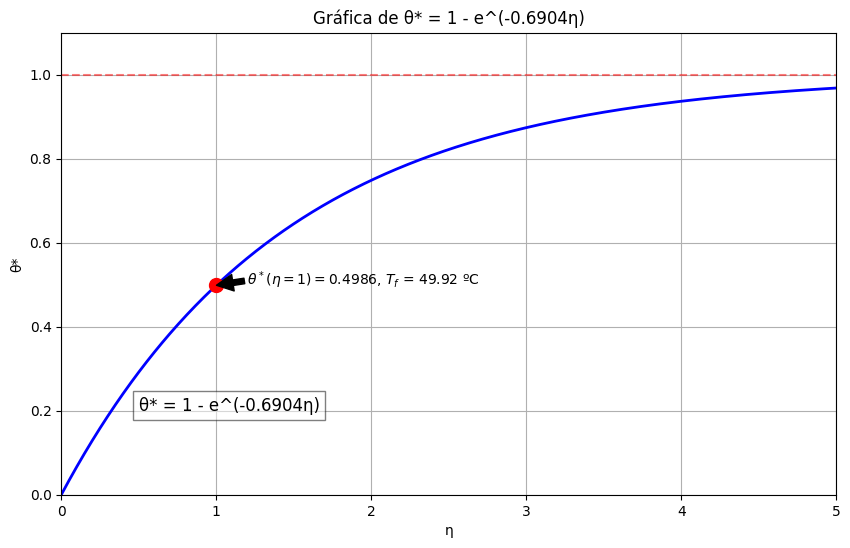

In [132]:
def theta_estrella(eta, LAMBDA, v_e):
    a = LAMBDA / v_e
    return 1 - np.exp(-a * eta)

# Crear un rango de valores para eta
eta = np.linspace(0, 5, 1000)  # Ajusta el rango según sea necesario

# Calcular theta_estrella para cada valor de eta
theta = theta_estrella(eta, LAMBDA, v_e)

# Calcular theta cuando eta = 1
eta_1 = 1
theta_1 = theta_estrella(eta_1, LAMBDA, v_e)

# Calculo de la temperatura en K
T_f = delta_T * theta_1 + T_a

print(f"El valor de theta cuando eta = 1 es: {theta_1:.4f}")

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(eta, theta, 'b-', linewidth=2)
plt.title(f'Gráfica de θ* = 1 - e^(-{a:.4f}η)')
plt.xlabel('η')
plt.ylabel('θ*')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)  # Línea asintótica en y=1
plt.xlim(0, max(eta))
plt.ylim(0, 1.1)

# Marcar el punto (1, theta_1) en la gráfica
plt.plot(1, theta_1, 'ro', markersize=10)  # 'ro' significa un punto rojo
plt.annotate(r'$\theta^* (\eta = 1) = $' + f'{theta_1:.4f}' + f', $T_f$ = {T_f-273:.2f} ºC', xy=(1, theta_1), xytext=(1.2, theta_1),
             arrowprops=dict(facecolor='black', shrink=0.005))

# Añadir una ecuación en la gráfica
plt.text(0.5, 0.2, f'θ* = 1 - e^(-{a:.4f}η)', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


## DISTRIBUCIÓN DE PRESIONES

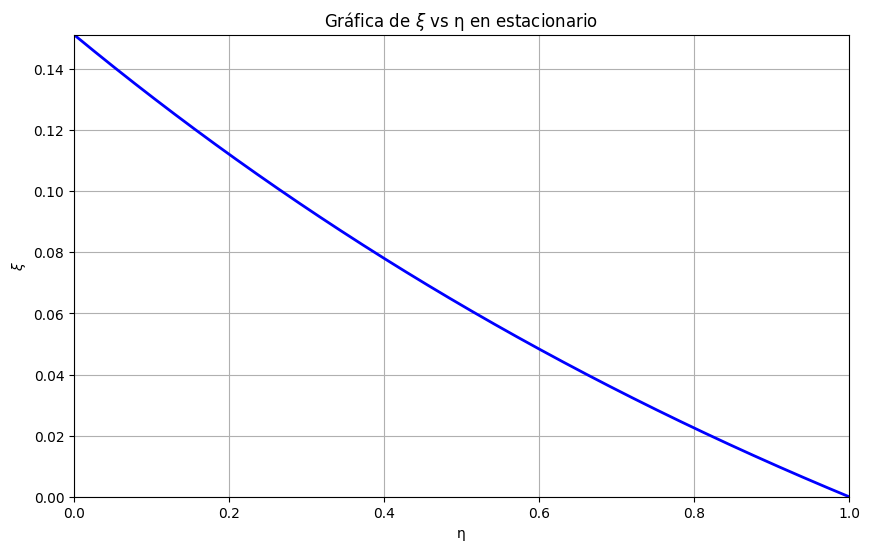

In [111]:
def xi_fun(eta, v_e, Ra, phi, LAMBDA):
    return v_e**2 / (Ra * phi) * (1 - eta) - LAMBDA / (phi * v_e) * (1 - np.exp(-(LAMBDA/v_e) * (eta - 1)))

# Crear un rango de valores para eta
eta = np.linspace(0, 1, 1000)  # Ajusta el rango según sea necesario

# Calcular theta_estrella para cada valor de eta
xi_dist = xi_fun(eta, v_e, Ra, phi, LAMBDA)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(eta, xi_dist, 'b-', linewidth=2)
plt.title(f'Gráfica de ' + r'$\xi$ vs η en estacionario')
plt.xlabel('η')
plt.ylabel(r'$\xi$')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)  # Línea asintótica en y=1
plt.xlim(0, max(eta))
plt.ylim(0, max(xi_dist))

# Añadir una ecuación en la gráfica
#plt.text(0.5, 0.2, f'θ* = 1 - e^(-{a:.4f}η)', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

## VARIACIÓN DE PARAMETROS 

# Extremos de los valoresd De $\Lambda$, $\phi$, Ri y Ra. + valores para la representación

In [112]:
temperaturas = np.array([10, 1000])
LAMBDA_extremos = [1, 10**3]
phi_extremos = 1/ (beta * temperaturas)
Ri_extremos = 2 * rho_0**2 * g * beta * L * Cp**2 * temperaturas /  h**2 
Ra_extremos = rho_0**2 * g * beta * Cp * D**2 * temperaturas / (16 * nu * h) 

print('LAMBDA ' + str(LAMBDA_extremos) + '\nphi ' + str(phi_extremos) + '\nRi ' + str(Ri_extremos) + '\nRa ' + str(Ra_extremos))

LAMBDA_barrido = np.linspace(LAMBDA_extremos[0], LAMBDA_extremos[1], 100)
phi_barrido = np.linspace(phi_extremos[0], phi_extremos[1], 100)
Ri_barrido = np.linspace(Ri_extremos[0], Ri_extremos[1], 100)
Ra_barrido = np.linspace(Ra_extremos[0], Ra_extremos[1], 100)

LAMBDA [1, 1000]
phi [27.2479564   0.27247956]
Ri [  47.16619549 4716.6195487 ]
Ra [  425785.03544995 42578503.54499479]


## Definición de valores constantes para el calculo de iscontornos

In [113]:
LAMBDA_cte = 10
Ri_cte = 10**2
Ra_cte = 10**6

In [115]:
import numpy as np
from scipy.optimize import fsolve

# Define a safe exponential function
def safe_exp(x):
    try:
        return np.exp(x) if x < 700 else np.inf
    except:
        return np.inf

# Define functions
def f(v, phi, Ri, Ra, LAMBDA):
    return phi + Ri**-1 * v**2 + Ra**-1 * v - 1 + (v/LAMBDA) * (1 - safe_exp(-LAMBDA/v))

def f_prime(v, Ri, Ra, LAMBDA):
    return 2 * Ri**-1 * v + Ra**-1 + (1/LAMBDA) * (1 - (1 + LAMBDA/v)*safe_exp(-LAMBDA/v))

def newton_raphson(phi, Ri, Ra, LAMBDA, v0=0.1, tol=1e-6, max_iter=100):
    v = v0
    for i in range(max_iter):
        try:
            v_new = v - f(v, phi, Ri, Ra, LAMBDA) / f_prime(v, Ri, Ra, LAMBDA)
            if abs(v_new - v) < tol:
                return v_new
            v = v_new
        except:
            return np.nan
    return np.nan  # Return NaN if it doesn't converge

def calculate_theta(LAMBDA, v):
    return 1 - safe_exp(-LAMBDA/v)

# Initialize matrices
v_lambda_phi = np.zeros((100, 100))
v_Ri_phi = np.zeros((100, 100))
v_Ra_phi = np.zeros((100, 100))

theta_lambda_phi = np.zeros((100, 100))
theta_Ri_phi = np.zeros((100, 100))
theta_Ra_phi = np.zeros((100, 100))

# Fill matrices
for i in range(100):
    for j in range(100):
        try:
            # LAMBDA and phi variables
            v = newton_raphson(phi_barrido[j], Ri_cte, Ra_cte, LAMBDA_barrido[i])
            v_lambda_phi[i, j] = v
            theta_lambda_phi[i, j] = calculate_theta(LAMBDA_barrido[i], v)
            
            # Ri and phi variables
            v = newton_raphson(phi_barrido[j], Ri_barrido[i], Ra_cte, LAMBDA_cte)
            v_Ri_phi[i, j] = v
            theta_Ri_phi[i, j] = calculate_theta(LAMBDA_cte, v)
            
            # Ra and phi variables
            v = newton_raphson(phi_barrido[j], Ri_cte, Ra_barrido[i], LAMBDA_cte)
            v_Ra_phi[i, j] = v
            theta_Ra_phi[i, j] = calculate_theta(LAMBDA_cte, v)
        except:
            print(f"Error at i={i}, j={j}")
            v_lambda_phi[i, j] = np.nan
            theta_lambda_phi[i, j] = np.nan
            v_Ri_phi[i, j] = np.nan
            theta_Ri_phi[i, j] = np.nan
            v_Ra_phi[i, j] = np.nan
            theta_Ra_phi[i, j] = np.nan

print("Matrices created successfully.")


/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1339/4258979976.py:22: RuntimeWarning: invalid value encountered in scalar divide
  v_new = v - f(v, phi, Ri, Ra, LAMBDA) / f_prime(v, Ri, Ra, LAMBDA)


Matrices created successfully.


/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1339/691806621.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[0, 0].set_xlim(0, 8e-1)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1339/691806621.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[0, 1].set_xlim(0, 8e-1)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1339/691806621.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[0, 2].set_xlim(0, 8e-1)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1339/691806621.py:52: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[1, 0].set_xlim(0, 8e-1)
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1339/691806621.py:62: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[1, 1].set_xlim(0, 8e-1)
/var/folders/lx/vhxvbgp94

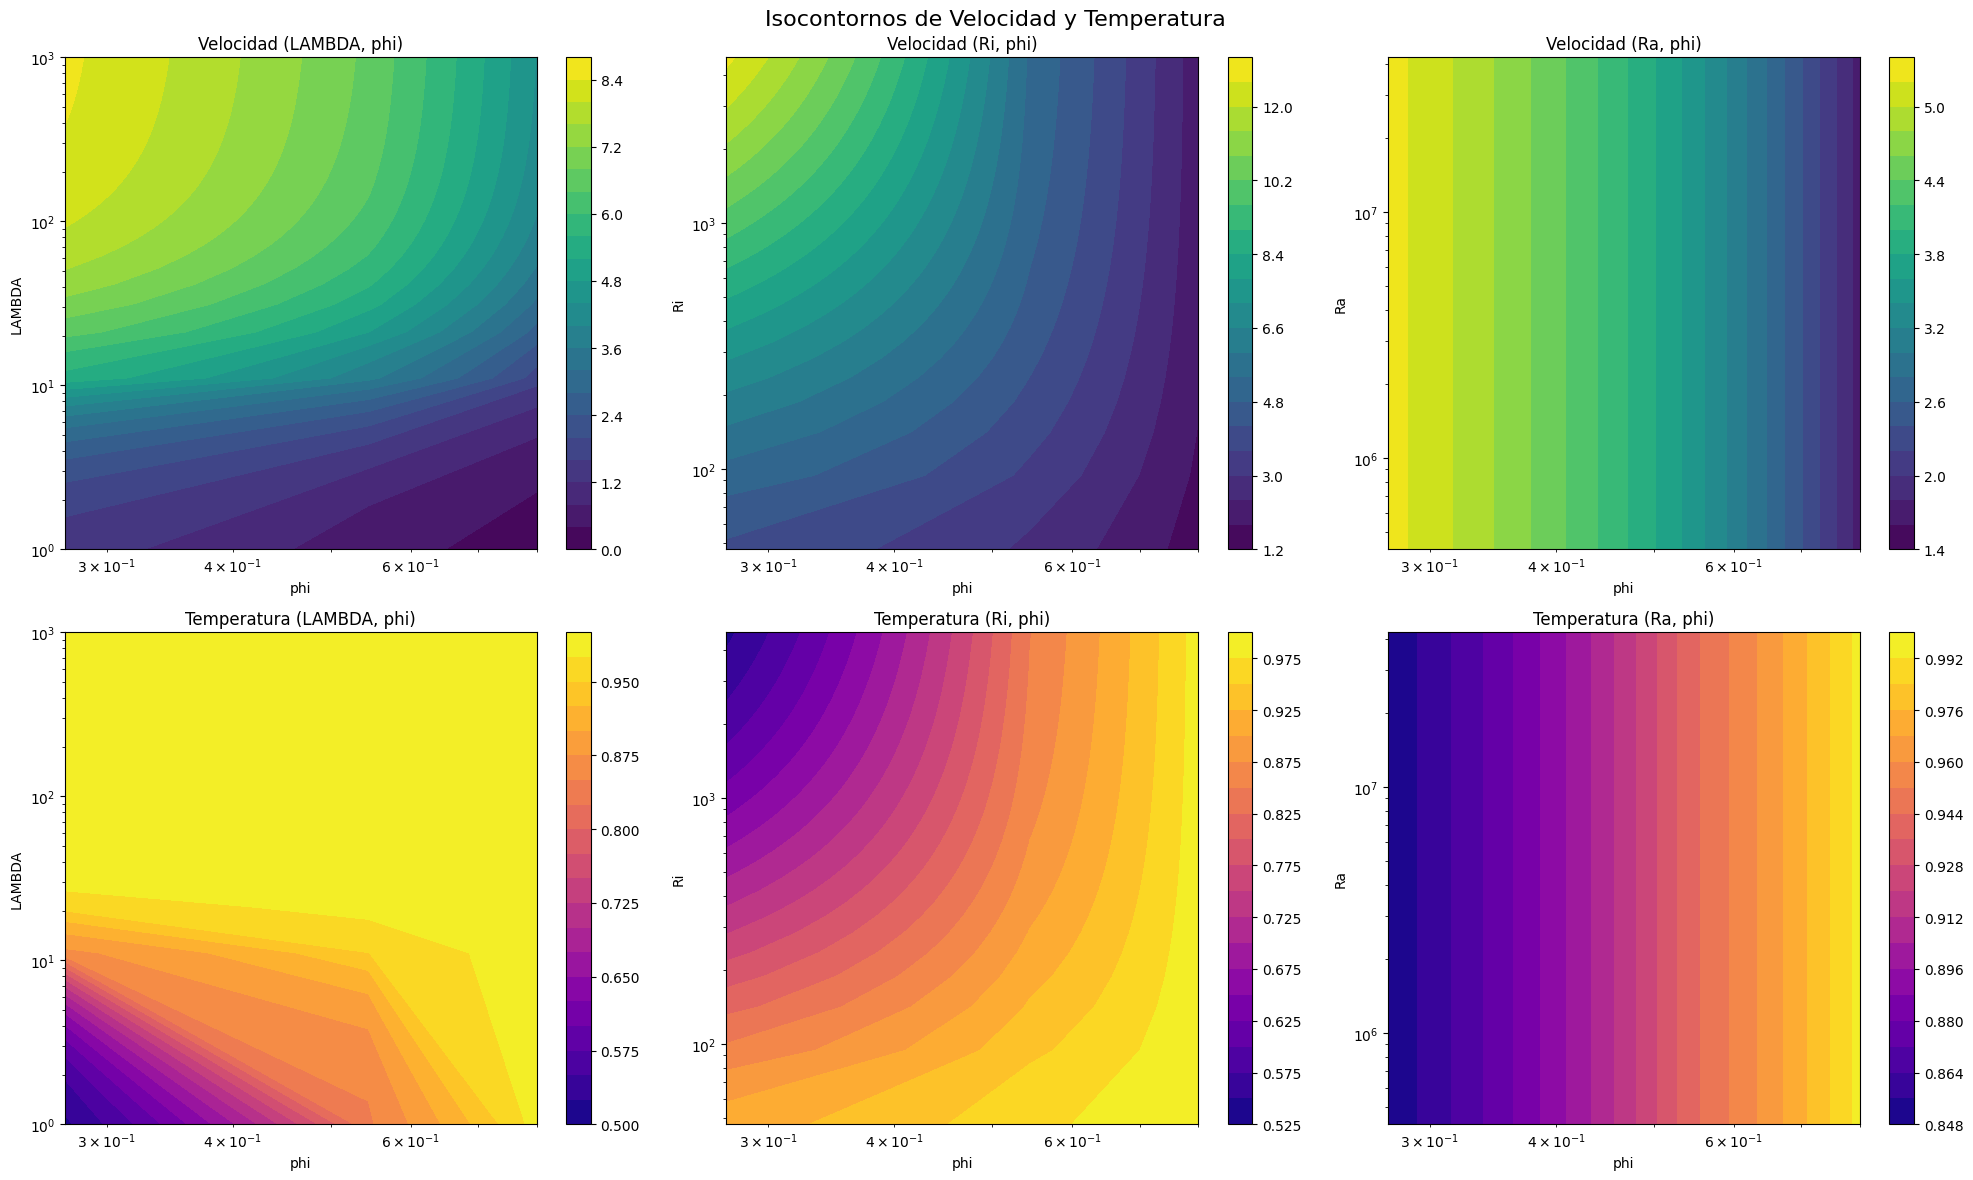

0.8


In [130]:
# Crear una figura con 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Isocontornos de Velocidad y Temperatura', fontsize=16)

# Definir los rangos para los ejes
phi_range = np.linspace(phi_extremos[0], phi_extremos[1], 100)
LAMBDA_range = np.linspace(LAMBDA_extremos[0], LAMBDA_extremos[1], 100)
Ri_range = np.linspace(Ri_extremos[0], Ri_extremos[1], 100)
Ra_range = np.linspace(Ra_extremos[0], Ra_extremos[1], 100)

# 1. v_lambda_phi
im1 = axs[0, 0].contourf(phi_range, LAMBDA_range, v_lambda_phi, levels=20, cmap='viridis')
axs[0, 0].set_title('Velocidad (LAMBDA, phi)')
axs[0, 0].set_xlabel('phi')
axs[0, 0].set_ylabel('LAMBDA')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlim(0, 8e-1) 
axs[0, 0].set_ylim(min(LAMBDA_range), max(LAMBDA_range))  
fig.colorbar(im1, ax=axs[0, 0])


# 2. v_Ri_phi
im2 = axs[0, 1].contourf(phi_range, Ri_range, v_Ri_phi, levels=20, cmap='viridis')
axs[0, 1].set_title('Velocidad (Ri, phi)')
axs[0, 1].set_xlabel('phi')
axs[0, 1].set_ylabel('Ri')
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlim(0, 8e-1) 
axs[0, 1].set_ylim(min(Ri_range), max(Ri_range)) 
fig.colorbar(im2, ax=axs[0, 1])

# 3. v_Ra_phi
im3 = axs[0, 2].contourf(phi_range, Ra_range, v_Ra_phi, levels=20, cmap='viridis')
axs[0, 2].set_title('Velocidad (Ra, phi)')
axs[0, 2].set_xlabel('phi')
axs[0, 2].set_ylabel('Ra')
axs[0, 2].set_xscale('log')
axs[0, 2].set_yscale('log')
axs[0, 2].set_xlim(0, 8e-1) 
axs[0, 2].set_ylim(min(Ra_range), max(Ra_range)) 
fig.colorbar(im3, ax=axs[0, 2])

# 4. theta_lambda_phi
im4 = axs[1, 0].contourf(phi_range, LAMBDA_range, theta_lambda_phi, levels=20, cmap='plasma')
axs[1, 0].set_title('Temperatura (LAMBDA, phi)')
axs[1, 0].set_xlabel('phi')
axs[1, 0].set_ylabel('LAMBDA')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlim(0, 8e-1) 
fig.colorbar(im4, ax=axs[1, 0])

# 5. theta_Ri_phi
im5 = axs[1, 1].contourf(phi_range, Ri_range, theta_Ri_phi, levels=20, cmap='plasma')
axs[1, 1].set_title('Temperatura (Ri, phi)')
axs[1, 1].set_xlabel('phi')
axs[1, 1].set_ylabel('Ri')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlim(0, 8e-1)
fig.colorbar(im5, ax=axs[1, 1])

# 6. theta_Ra_phi
im6 = axs[1, 2].contourf(phi_range, Ra_range, theta_Ra_phi, levels=20, cmap='plasma')
axs[1, 2].set_title('Temperatura (Ra, phi)')
axs[1, 2].set_xlabel('phi')
axs[1, 2].set_ylabel('Ra')
axs[1, 2].set_xscale('log')
axs[1, 2].set_yscale('log')
axs[1, 2].set_xlim(0, 8e-1)
fig.colorbar(im6, ax=axs[1, 2])

plt.tight_layout()
plt.show()

print(8e-1)